In [2]:
import matplotlib.pyplot as plt
import numpy as np
import mnist

In [3]:
ROWS                  = 5
COLUMNS               = 5
DIMENSIONS            = 200
NUMBERS_OF_IMAGES     = 55000

In [4]:
class my_PCA():

    def __init__(self, n_components = None):
        if not isinstance(n_components, int):
            raise TypeError("Passed paramater must have integer type")
        if n_components <= 0:
            raise ValueError("Number of neighbours mustn't be non-positive")

        self.__n_components = n_components

    def display_input_data(self, train, validation, test):
        print("Число картинок: ", len(train[0]))
        print("Сами числа в виде Numpy-массива", train[1])
        print("Число картинок, поделащих валидации:", len(validation[0]))
        print("Картинки, подлежащие валидации, в виде Numpy-массива:", validation[1])

    def display_MNIST_digits(self, images, rows = ROWS, columns = COLUMNS, title = "Image №", suptitle = "MNIST Images"):
        plt.figure(figsize = (10, 10))
        for index in range(1, rows * columns + 1):
            plt.subplot(rows, columns, index)
            plt.imshow(images[index - 1], cmap = plt.get_cmap("gray"))
            plt.xticks([])
            plt.yticks([])
            plt.title(title + str(index))
        plt.suptitle(suptitle)
        plt.show()

    def fit(self, X):
        # Центрирование
        self.__mean_vector = np.mean(X, axis = 0)
        self.__X_centered = X - self.__mean_vector

        # Получение матрицы ковариации
        cov_matrix = self.__X_centered.transpose() @ self.__X_centered

        # Получение собственных значений и собственных векторов
        return np.linalg.eig(cov_matrix)

    def transform(self):
        return self.__X_centered @ self.__sorted_eigenvectors[ : , : self.__n_components]

    def fit_transform(self, X):
        self.__eigenvalues, self.__eigenvectors = self.fit(X)

        sorted_indexes               = np.argsort(self.__eigenvalues)[ : : -1]
        self.__sorted_eigenvalues    = self.__eigenvalues[sorted_indexes]
        self.__sorted_eigenvectors   = self.__eigenvectors[ : , sorted_indexes]

        return self.transform()

    def get_eigenvalues_ratio(self):
        return self.__sorted_eigenvalues[ : self.__n_components] / np.sum(self.__sorted_eigenvalues[ : self.__n_components])

    def get_cum_ratio(self):
        return np.cumsum(self.get_eigenvalues_ratio())

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


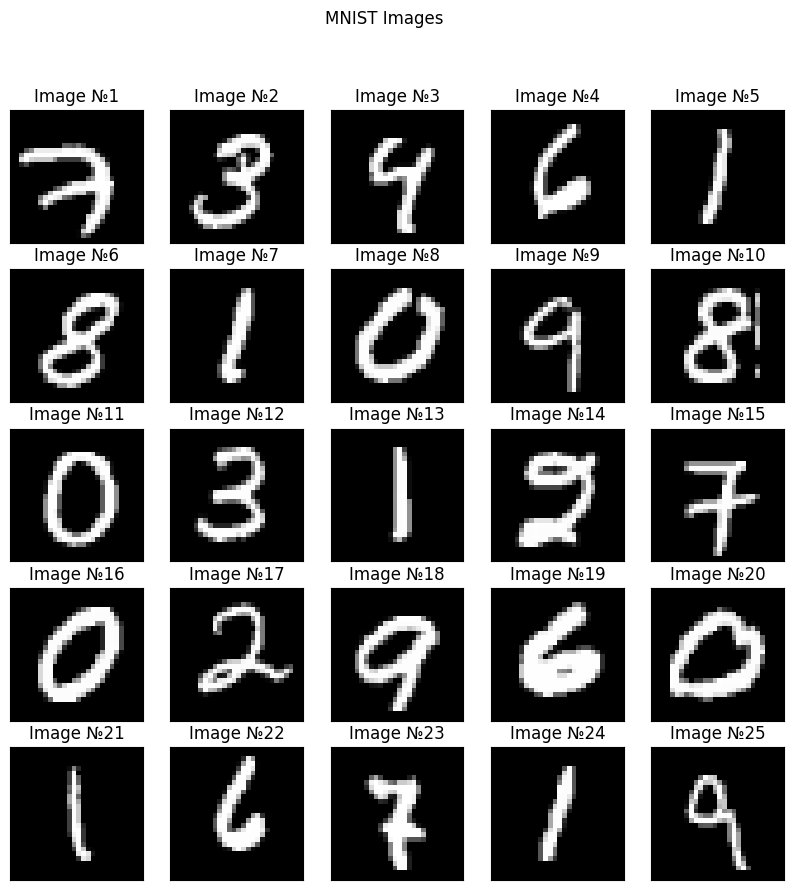

(array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],

In [5]:
#    train - кортеж, 1-ый элемент которого - это изображения размером 28 x 28 пикселей, каждому из которых поставлена в соответствие матрциа 28 x 28
#                    2-ой элемент которого - это сами цифры в обычном числовом формате, закодированные соответствующими изображениями.

train, validation, test = mnist.load_mnist()

my_pca = my_PCA(DIMENSIONS)
my_pca.display_MNIST_digits(train[0])

train_images = train[0].reshape(train[0].shape[0], -1).astype("float32")
Y = my_pca.fit_transform(train_images[ : NUMBERS_OF_IMAGES])
print(test)

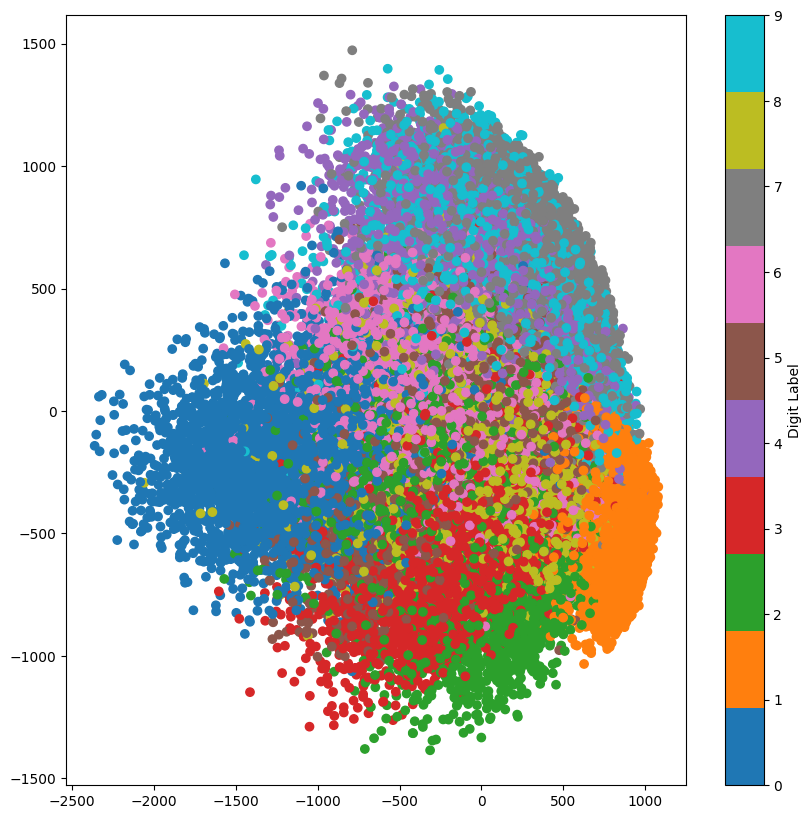

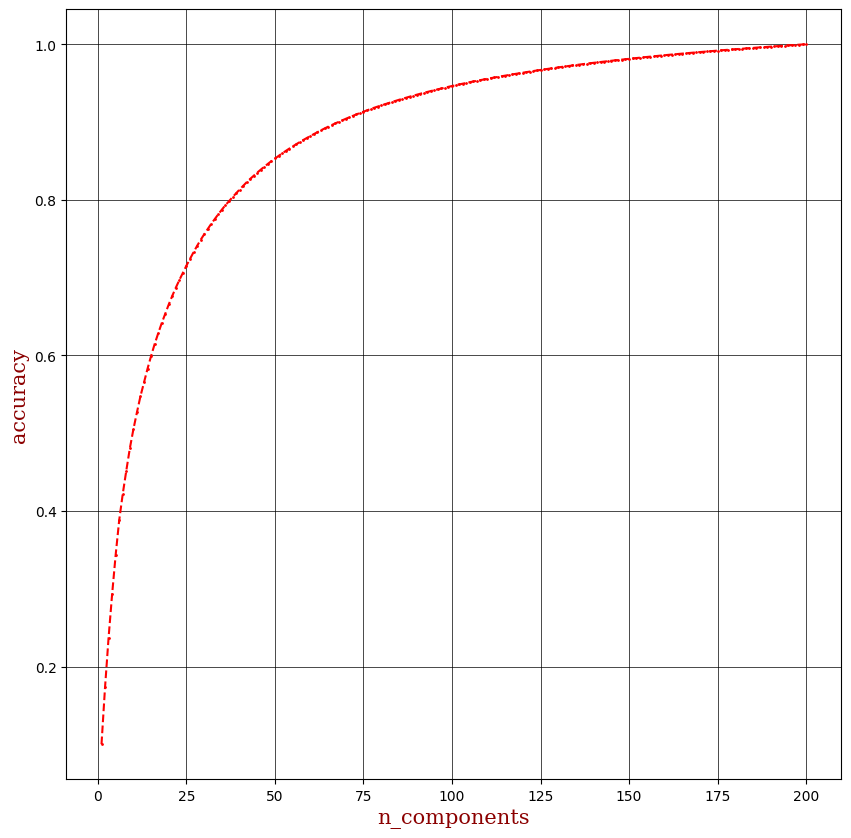

In [390]:
plt.figure(figsize = (10, 10))
scatter = plt.scatter(Y[ : , 0], Y[ : , 1], c = train[1][ : NUMBERS_OF_IMAGES], cmap = "tab10")
plt.colorbar(scatter, ticks = range(10), label = "Digit Label")
plt.show()

eigenvalues_ratio = my_pca.get_eigenvalues_ratio()
cum_ratio = my_pca.get_cum_ratio()

font = {"family" : "serif", "color": "darkred", "size": 15}
plt.figure(figsize = (10, 10))
plt.plot(range(1, len(eigenvalues_ratio) + 1), cum_ratio, marker = "o", color = "red", linestyle = "--", markersize = 1)
plt.xlabel("n_components", fontdict = font)
plt.ylabel("accuracy", fontdict = font)
plt.grid(color = 'black', linestyle = '-', linewidth = 0.5)
plt.show()